In [24]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import os

In [25]:
os.chdir("/home/mangus/Anubis/")

In [26]:
df = pd.read_csv("logs/2024-04-24_01-19-35/predictions.csv")

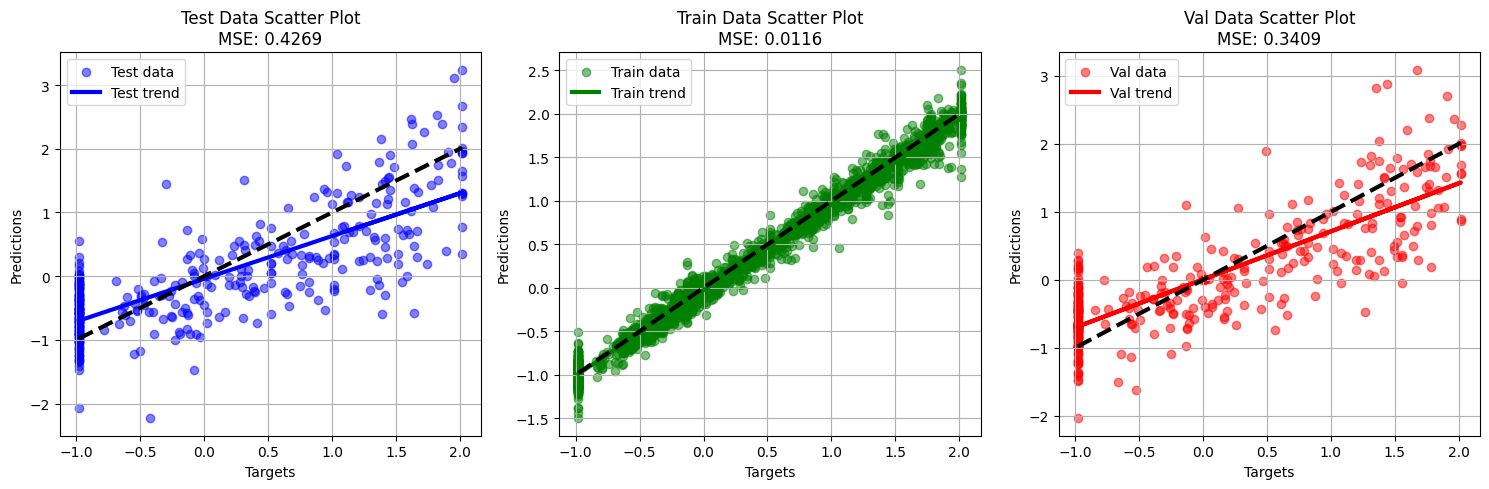

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def result_plotter(df):
    # Assuming df is already defined with columns 'test', 'train', 'val', 'target_00', 'pred_00'

    # Define conditions and choices for colors
    conditions = [
        (df['test'] == 1.0),
        (df['train'] == 1.0),
        (df['val'] == 1.0)
    ]
    choices = ['blue', 'green', 'red']  # Test: Blue, Train: Green, Val: Red
    df['color'] = np.select(conditions, choices, default='black')

    # Plotting
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # Create 3 subplots side by side
    colors = ['blue', 'green', 'red']
    labels = ['Test', 'Train', 'Val']

    for ax, color, label in zip(axs, colors, labels):
        group = df[df['color'] == color]
        ax.scatter(group['target_00'], group['pred_00'], label=f"{label} data", color=color, alpha=0.5)
        # Linear regression
        if len(group) > 1:  # We need at least two points to fit a line
            m, b = np.polyfit(group['target_00'], group['pred_00'], 1)
            ax.plot(group['target_00'], m * group['target_00'] + b, color=color, label=f'{label} trend', linewidth=3)
        # Ideal case line
        x_values = np.array([df['target_00'].min(), df['target_00'].max()])
        ax.plot(x_values, x_values, linestyle='--', color='black', linewidth=3)

        # Calculate MSE and add to title
        mse = np.mean((group['target_00'] - group['pred_00']) ** 2)
        ax.set_title(f'{label} Data Scatter Plot\nMSE: {mse:.4f}')
        ax.set_xlabel('Targets')
        ax.set_ylabel('Predictions')
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()
result_plotter(df)


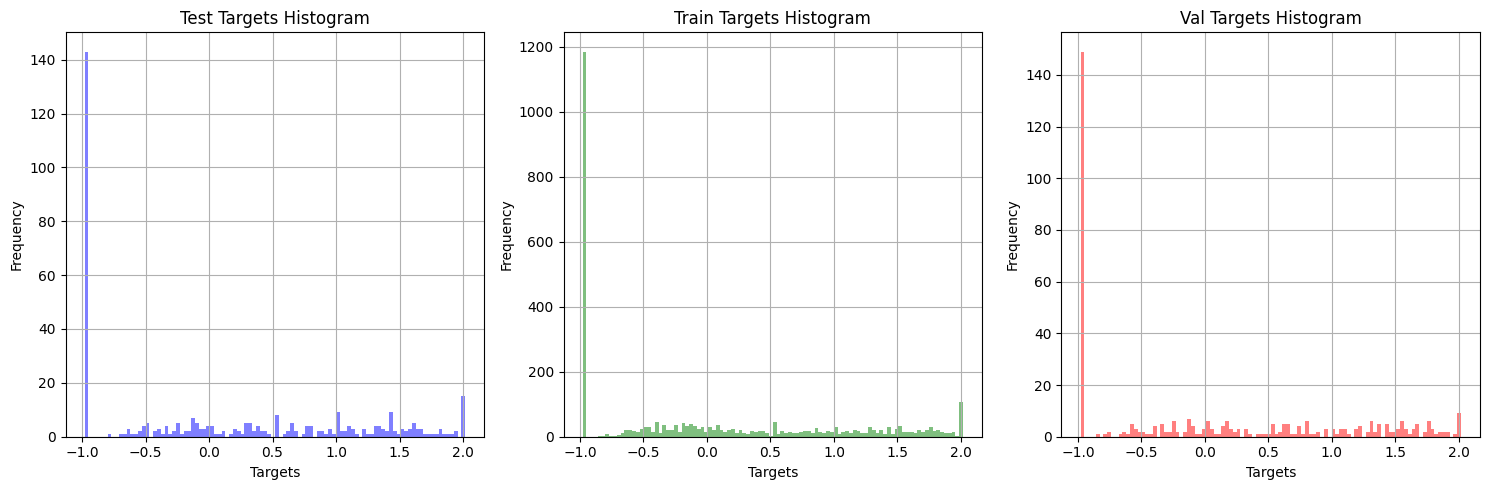

In [28]:
# Plotting
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # Create 3 subplots side by side
colors = ['blue', 'green', 'red']
labels = ['Test', 'Train', 'Val']

for ax, color, label in zip(axs, colors, labels):
    # Filtering data based on the color which corresponds to the condition
    data = df[df['color'] == color]['target_00']
    ax.hist(data, bins=100, color=color, alpha=0.5)  # Histogram
    ax.set_title(f'{label} Targets Histogram')
    ax.set_xlabel('Targets')
    ax.set_ylabel('Frequency')
    ax.grid(True)

plt.tight_layout()
plt.show()

In [29]:
df_data = pd.read_csv("data/raw/scraped_proteins_dataset_PDB_new_1000.csv")

In [30]:
red_df = df_data.drop(df_data[df_data["Alpha"]==0].index)
red_df = red_df.drop(df_data[df_data["Alpha"]==100].index)

In [31]:
df_data["Alpha_st"] = (df_data["Alpha"] - df_data["Alpha"].mean()) / df_data[
                "Alpha"
            ].std()

In [32]:
red_df["Alpha_st"] = (red_df["Alpha"] - red_df["Alpha"].mean()) / red_df[
                "Alpha"
            ].std()

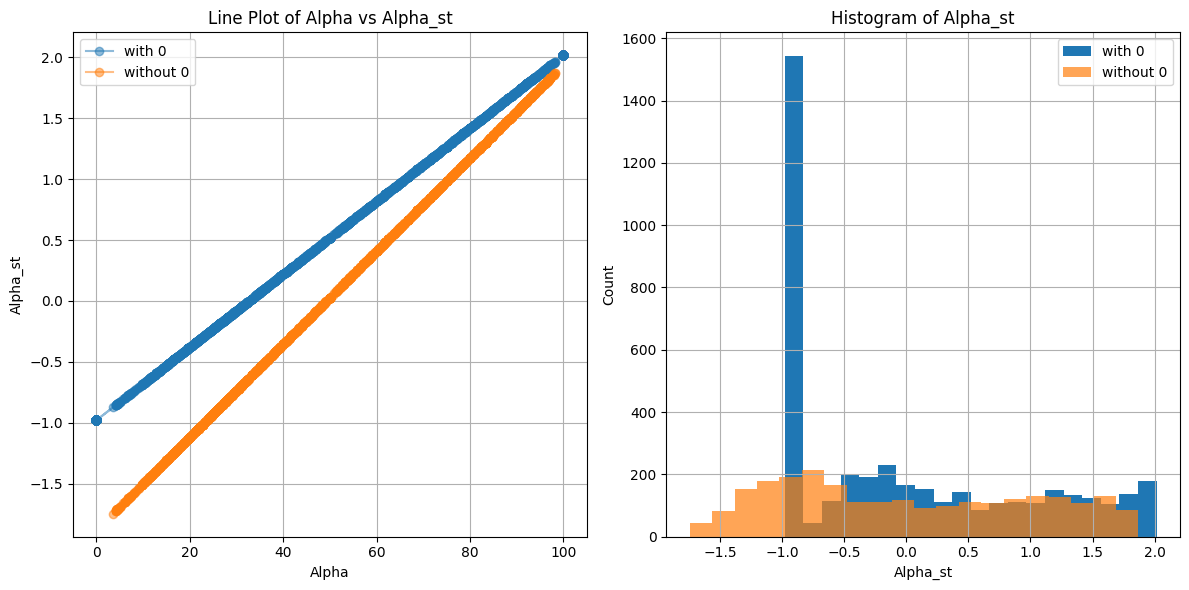

In [33]:
# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# First subplot: Line plot of Alpha vs Alpha_st
ax1.plot(df_data.Alpha, df_data.Alpha_st, label="with 0", marker='o', linestyle='-', alpha=0.5)
ax1.plot(red_df.Alpha, red_df.Alpha_st, label="without 0", marker='o', linestyle='-', alpha=0.5)
ax1.set_title("Line Plot of Alpha vs Alpha_st")
ax1.set_xlabel("Alpha")
ax1.set_ylabel("Alpha_st")
ax1.legend(loc='upper left')
ax1.grid(True)

# Second subplot: Histogram of Alpha_st
ax2.hist(df_data.Alpha_st, bins=20, alpha=1, label="with 0")
ax2.hist(red_df.Alpha_st, bins=20, alpha=0.7, label="without 0")
ax2.set_title("Histogram of Alpha_st")
ax2.set_xlabel("Alpha_st")
ax2.set_ylabel("Count")
ax2.legend(loc='upper right')
ax2.grid(True)

plt.tight_layout()
plt.show()

In [34]:
df_after = pd.read_csv("logs/2024-04-24_14-50-16/predictions.csv")

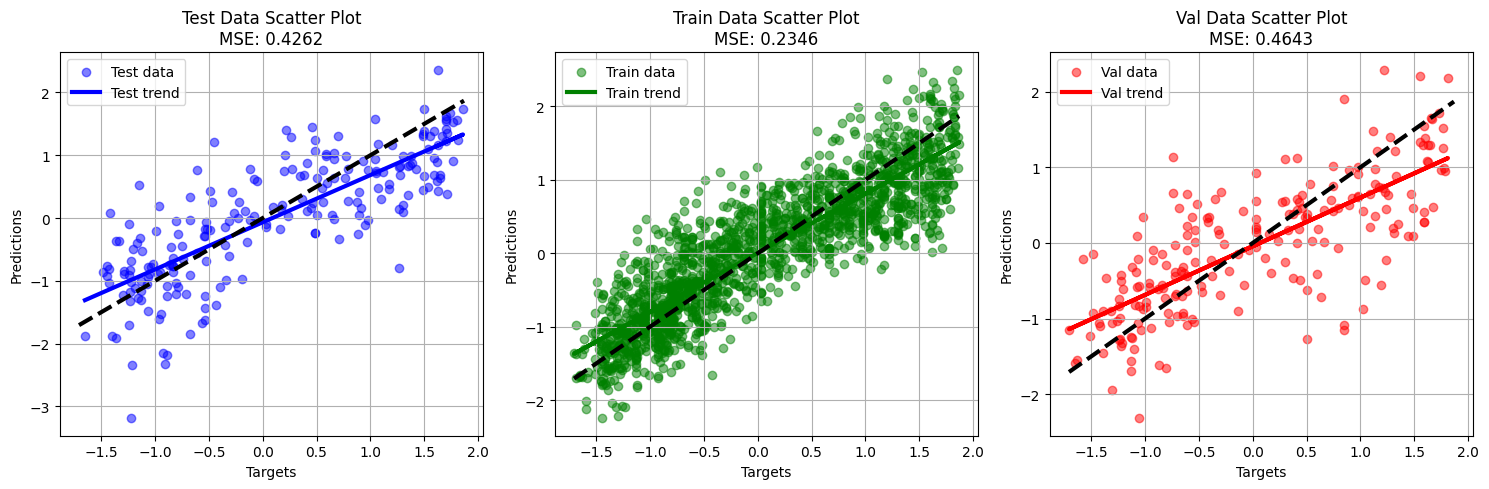

In [35]:
result_plotter(df_after)

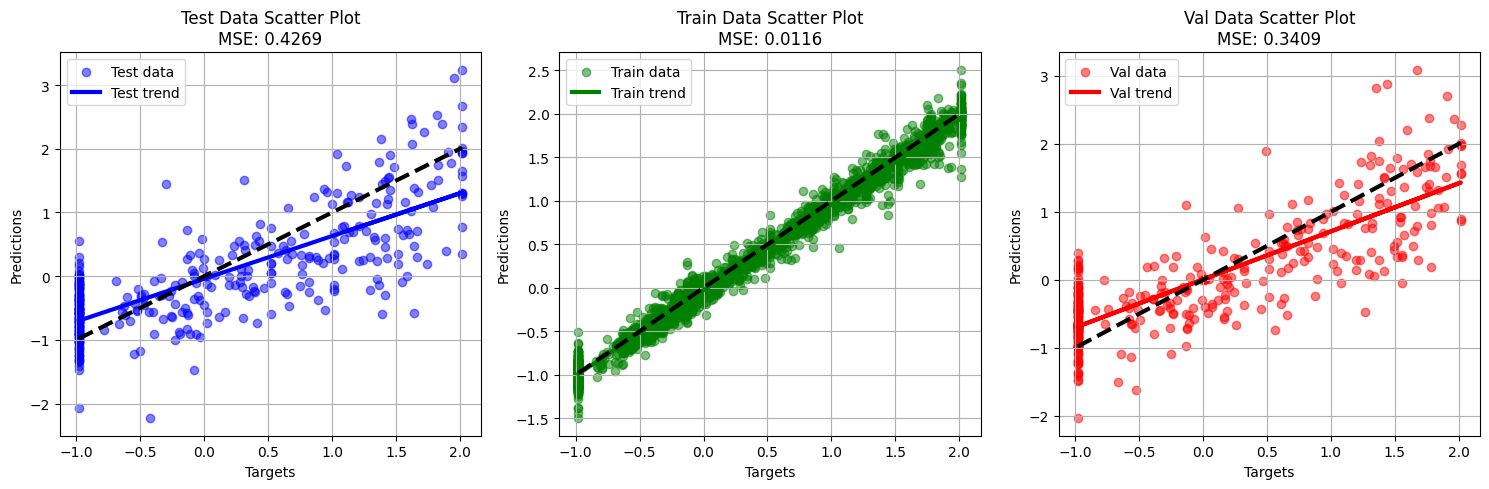

In [37]:
result_plotter(df)


In [36]:
plt.hist(df_after.Alpha)

AttributeError: 'DataFrame' object has no attribute 'Alpha'

In [ ]:
os.getcwd()

'/home/mangus/Anubis'